### Numpy

In [1]:
import numpy as np

In [2]:
# Note that numpy.array is not the same as the Standard Python Library class array.array,
# which only handles one-dimensional arrays and offers less functionality.

a = np.arange(15).reshape(3, 5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [3]:
print(a.shape)
print(a.ndim)
print(a.itemsize)
print(a.size)
print(type(a))

(3, 5)
2
4
15
<class 'numpy.ndarray'>


In [4]:
# dir(a)

In [5]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(data1)
print(arr1)

[6, 7.5, 8, 0, 1]
[ 6.   7.5  8.   0.   1. ]


In [6]:
d = [[ 0.9526, -0.246 , -0.8856], [ 0.5639, 0.2379, 0.9104]]
data = np.array(d)
print(data)
print(data.shape, np.shape(data), data.dtype, data.ndim)

[[ 0.9526 -0.246  -0.8856]
 [ 0.5639  0.2379  0.9104]]
(2, 3) (2, 3) float64 2


In [7]:
print(data * 10)

[[ 9.526 -2.46  -8.856]
 [ 5.639  2.379  9.104]]


In [8]:
print(data)

[[ 0.9526 -0.246  -0.8856]
 [ 0.5639  0.2379  0.9104]]


In [9]:
print(data+data) # Try +-*/ and **

[[ 1.9052 -0.492  -1.7712]
 [ 1.1278  0.4758  1.8208]]


In [10]:
print(np.zeros(10)) # np.ones() does similar action, but fill them with 1s.

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [11]:
print(np.zeros((3,6))) # DO NOT USE np.empty()

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


### Indexing and Slicing

In [12]:
arr = np.arange(10) # do not use np.array(range(10))

In [13]:
print(arr)
print(arr[5])
print(arr[5:8])

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]


In [14]:
arr[5:8] = 12 # the value is propagated (or broadcasted henceforth) to the entire selection
print(arr) # Explain 'view'

[ 0  1  2  3  4 12 12 12  8  9]


In [15]:
# Try to recall "deep copy" and "shadow copy"
arr_slice = arr[5:8]
arr_slice[1] = 666
print(arr_slice)
print(arr)
ar = arr
print(ar is arr)

[ 12 666  12]
[  0   1   2   3   4  12 666  12   8   9]
True


In [16]:
ar = arr.copy()
print(ar is arr)

False


### 2D

In [17]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d[2])

[7 8 9]


In [18]:
print(arr2d[0][2])
print(arr2d[0, 2]) # draw picture of a 2d array of index

3
3


In [19]:
# see np.copy()

In [20]:
# Try 3D
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


### Slices

In [21]:
import pprint as pp

In [22]:
print(arr2d)
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [23]:
pp.pprint(arr2d)
pp.pprint(arr2d[:2, 1:])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])
array([[2, 3],
       [5, 6]])


In [24]:
pp.pprint(arr2d[1]) # Try 7 as index
print(arr2d.shape)

array([4, 5, 6])
(3, 3)


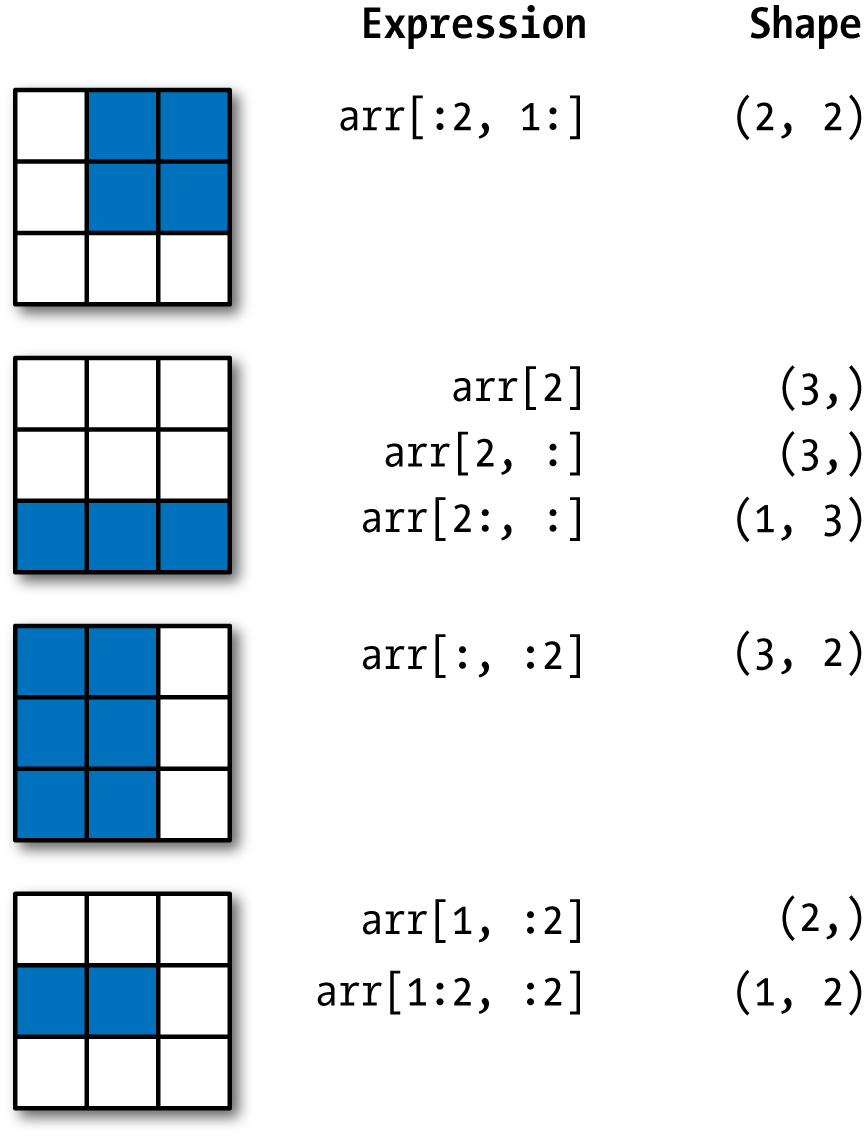

In [25]:
from IPython.display import Image
Image(filename='2darray.png', width=400) 

### Boolean Indexing

In [26]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4) # Try 'import numpy.random.randn as randn', then 'randn(7, 4)'

In [27]:
# DO NOT USE Python built-in random number generator
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

1 loop, best of 3: 1.1 s per loop
10 loops, best of 3: 48 ms per loop


In [28]:
#help(np.random)

In [29]:
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.51888204  0.57550415 -0.88251653 -0.84207275]
 [ 1.88226556 -0.18540287  0.71146783 -0.12319467]
 [-1.46682944  0.71262187  0.20033872  1.7016155 ]
 [ 0.30987553  2.17702184  0.19582323  1.19951885]
 [ 0.80277242  1.1143432   1.33255262 -1.75082295]
 [ 0.80513009 -0.08834916  2.23804485 -1.01638593]
 [ 0.55506412 -0.71838818 -0.71234004 -1.37330953]]


In [30]:
names == 'Bob' # == is an operation among each element in np's data

array([ True, False, False,  True, False, False, False], dtype=bool)

In [31]:
# Equal to names == 'Bob'
def eq(names):
    for name in names:
        yield name == 'Bob'

list(eq(names))

[True, False, False, True, False, False, False]

In [32]:
# So convenient!
data[names == 'Bob']

array([[-0.51888204,  0.57550415, -0.88251653, -0.84207275],
       [ 0.30987553,  2.17702184,  0.19582323,  1.19951885]])

In [33]:
data[names == 'Bob', 2:]

array([[-0.88251653, -0.84207275],
       [ 0.19582323,  1.19951885]])

In [34]:
# Select everything but 'Bob'
data[(names != 'Bob')]

array([[ 1.88226556, -0.18540287,  0.71146783, -0.12319467],
       [-1.46682944,  0.71262187,  0.20033872,  1.7016155 ],
       [ 0.80277242,  1.1143432 ,  1.33255262, -1.75082295],
       [ 0.80513009, -0.08834916,  2.23804485, -1.01638593],
       [ 0.55506412, -0.71838818, -0.71234004, -1.37330953]])

In [35]:
# mask, but not that efficient
mask = (names == 'Bob') | (names == 'Will')
data[mask]

array([[-0.51888204,  0.57550415, -0.88251653, -0.84207275],
       [-1.46682944,  0.71262187,  0.20033872,  1.7016155 ],
       [ 0.30987553,  2.17702184,  0.19582323,  1.19951885],
       [ 0.80277242,  1.1143432 ,  1.33255262, -1.75082295]])

In [36]:
print(data)
print(data[data < 0])

[[-0.51888204  0.57550415 -0.88251653 -0.84207275]
 [ 1.88226556 -0.18540287  0.71146783 -0.12319467]
 [-1.46682944  0.71262187  0.20033872  1.7016155 ]
 [ 0.30987553  2.17702184  0.19582323  1.19951885]
 [ 0.80277242  1.1143432   1.33255262 -1.75082295]
 [ 0.80513009 -0.08834916  2.23804485 -1.01638593]
 [ 0.55506412 -0.71838818 -0.71234004 -1.37330953]]
[-0.51888204 -0.88251653 -0.84207275 -0.18540287 -0.12319467 -1.46682944
 -1.75082295 -0.08834916 -1.01638593 -0.71838818 -0.71234004 -1.37330953]


In [37]:
# Equal to data < 0
def eq2(data):
    (x, y) = data.shape
    for i in range(x):
        for j in range(y):
            if data[i, j] < 0:
                yield data[i, j]

list(eq2(data))

[-0.51888204232689172,
 -0.8825165261753467,
 -0.84207274669669774,
 -0.18540286990234253,
 -0.12319467360904034,
 -1.4668294361910881,
 -1.7508229548719842,
 -0.088349160099878921,
 -1.0163859317093487,
 -0.71838817511409292,
 -0.71234003735396745,
 -1.3733095316951527]

In [38]:
data[data < 0] = 0 # Be careful, some of your data is lost!
print(data)

[[ 0.          0.57550415  0.          0.        ]
 [ 1.88226556  0.          0.71146783  0.        ]
 [ 0.          0.71262187  0.20033872  1.7016155 ]
 [ 0.30987553  2.17702184  0.19582323  1.19951885]
 [ 0.80277242  1.1143432   1.33255262  0.        ]
 [ 0.80513009  0.          2.23804485  0.        ]
 [ 0.55506412  0.          0.          0.        ]]


In [39]:
data[names == 'Joe'] = 7.0
print(data)

[[ 0.          0.57550415  0.          0.        ]
 [ 7.          7.          7.          7.        ]
 [ 0.          0.71262187  0.20033872  1.7016155 ]
 [ 0.30987553  2.17702184  0.19582323  1.19951885]
 [ 0.80277242  1.1143432   1.33255262  0.        ]
 [ 7.          7.          7.          7.        ]
 [ 7.          7.          7.          7.        ]]


### Fancy Indexing

In [40]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
print(arr)

[[ 0.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 2.  2.  2.  2.]
 [ 3.  3.  3.  3.]
 [ 4.  4.  4.  4.]
 [ 5.  5.  5.  5.]
 [ 6.  6.  6.  6.]
 [ 7.  7.  7.  7.]]


In [41]:
index = [4, 3, 0, 6]
arr[index]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [42]:
arr[[-1, -2, -3]]

array([[ 7.,  7.,  7.,  7.],
       [ 6.,  6.,  6.,  6.],
       [ 5.,  5.,  5.,  5.]])

### reshape

In [43]:
arr = np.arange(32)
print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [44]:
arr.reshape(8, 4) # view

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [45]:
print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [46]:
arr = np.arange(32).reshape(8, 4)
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [47]:
arr[5:, 1:]

array([[21, 22, 23],
       [25, 26, 27],
       [29, 30, 31]])

### Transposing Arrays and Swapping Axes

In [48]:
arr = np.arange(15).reshape((3, 5))
print(arr, arr.shape)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] (3, 5)


In [49]:
# Transpose, wiki has a demostrative gif
# https://en.wikipedia.org/wiki/Transpose
print(arr.T, arr.T.shape)

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]] (5, 3)


In [50]:
arr*arr.T # Error! Be careful!

ValueError: operands could not be broadcast together with shapes (3,5) (5,3) 

In [51]:
np.dot(arr, arr.T)

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [52]:
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

In [53]:
# high dimensional arrays
arr = np.arange(16).reshape((2, 2, 4))
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [54]:
print(arr.transpose((1, 0, 2)))

[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


In [55]:
print(arr.T) # a special case of transpose

[[[ 0  8]
  [ 4 12]]

 [[ 1  9]
  [ 5 13]]

 [[ 2 10]
  [ 6 14]]

 [[ 3 11]
  [ 7 15]]]


In [56]:
print(arr.transpose((0, 1, 2)))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


### Fast Element-wise Array Functions

In [57]:
arr = np.arange(16)
print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [58]:
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ,
        3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739,
        3.87298335])

In [59]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03,   2.20264658e+04,   5.98741417e+04,
         1.62754791e+05,   4.42413392e+05,   1.20260428e+06,
         3.26901737e+06])

In [60]:
print(np.max(arr), np.min(arr), np.mean(arr), np.std(arr), np.var(arr), np.sum(arr))
print(arr.max(), arr.min(), arr.mean(), arr.std(), arr.var(), arr.sum())

15 0 7.5 4.60977222865 21.25 120
15 0 7.5 4.60977222865 21.25 120


In [61]:
#help(np.maximum)
np.info(np.maximum)

maximum(x1, x2[, out])

Element-wise maximum of array elements.

Compare two arrays and returns a new array containing the element-wise
maxima. If one of the elements being compared is a NaN, then that
element is returned. If both elements are NaNs then the first is
returned. The latter distinction is important for complex NaNs, which
are defined as at least one of the real or imaginary parts being a NaN.
The net effect is that NaNs are propagated.

Parameters
----------
x1, x2 : array_like
    The arrays holding the elements to be compared. They must have
    the same shape, or shapes that can be broadcast to a single shape.

Returns
-------
y : ndarray or scalar
    The maximum of `x1` and `x2`, element-wise.  Returns scalar if
    both  `x1` and `x2` are scalars.

See Also
--------
minimum :
    Element-wise minimum of two arrays, propagates NaNs.
fmax :
    Element-wise maximum of two arrays, ignores NaNs.
amax :
    The maximum value of an array along a given axis, propagates NaNs

In [62]:
data1 = np.random.randn(7, 4)
data2 = np.random.randn(7, 4)

print(data1)
print(data2)
print(np.maximum(data1, data2)) # it is easy to distinguish element-wise operations and non- by the number of arguments.

[[-0.59003553  0.44058855  0.26073076 -0.64356637]
 [ 0.03555343  0.26787277 -1.330645   -0.48898312]
 [-1.96364129  0.9978635   1.08816114 -0.46715215]
 [-0.36689342  0.88083786 -1.24300585 -0.13495036]
 [-0.8976281   0.051261    0.52662965 -1.14437183]
 [ 0.89415656 -2.44377899 -0.90475668  1.1603207 ]
 [ 0.12381633  1.40953441  0.89416165  0.17535194]]
[[ 0.93374062  2.37605988  0.15173503  0.57464698]
 [-0.1914198   1.11385029  1.04704245 -0.34838415]
 [-0.98463227  0.04903704  0.41110682  0.74238611]
 [-0.01437895 -0.66463609  1.50661611  2.13357055]
 [ 0.44573064 -1.48902863 -1.59405348 -1.77401731]
 [ 0.21951802 -2.07439457 -1.26691995 -0.78325953]
 [ 0.15589912 -1.17688254  0.21977885 -0.22401267]]
[[ 0.93374062  2.37605988  0.26073076  0.57464698]
 [ 0.03555343  1.11385029  1.04704245 -0.34838415]
 [-0.98463227  0.9978635   1.08816114  0.74238611]
 [-0.01437895  0.88083786  1.50661611  2.13357055]
 [ 0.44573064  0.051261    0.52662965 -1.14437183]
 [ 0.89415656 -2.07439457 -0.

In [63]:
Tarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
Farr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
Cond = np.array([True, False, True, True, False])

# result = [(T if C else F)], do NOT use pure Python to compute result.
# It is slow on large array, and it is not work for multidimensional array.
result = np.where(Cond, Tarr, Farr)
print(result)

[ 1.1  2.2  1.3  1.4  2.5]


In [64]:
arr = np.random.randn(4, 4)
print(arr)
print(np.where(arr > 0, 2, -2))
print(np.where(arr > 0, 2, arr)) # set only positive values to 2

[[ 0.01214595  0.54374415  1.14593969  0.78277503]
 [-0.89054748  1.27405833 -0.88280927  0.36627872]
 [ 0.96894123  0.40109907  0.5863922  -0.37407955]
 [-0.13208064  1.02490383  1.28101143 -2.16448471]]
[[ 2  2  2  2]
 [-2  2 -2  2]
 [ 2  2  2 -2]
 [-2  2  2 -2]]
[[ 2.          2.          2.          2.        ]
 [-0.89054748  2.         -0.88280927  2.        ]
 [ 2.          2.          2.         -0.37407955]
 [-0.13208064  2.          2.         -2.16448471]]


### Basic set operations for one-dimensional ndarrays

In [65]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
name2 = np.array(['Bob', 'Alice', 'Mike', 'John', 'Cathy'])

print(np.unique(names)) # numpy returns sotred and unique elements 
print(sorted(set(names))) # pure python. DO NOT DO THIS.

print(np.union1d(names, name2))
print(np.intersect1d(names, name2))
print(np.in1d(names, name2)) # whether each element of x is contained in y

['Bob' 'Joe' 'Will']
['Bob', 'Joe', 'Will']
['Alice' 'Bob' 'Cathy' 'Joe' 'John' 'Mike' 'Will']
['Bob']
[ True False False  True False False False]


## An Example of Numpy

In [66]:
points = np.arange(-5, 5, 0.01) # help(np.arange)

In [67]:
xs, ys = np.meshgrid(points, points) # takes two 1D arrays and produces two 2D matrices
print(xs)

[[-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 ..., 
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...,  4.97  4.98  4.99]]


In [68]:
print(xs.shape, ys.shape)

(1000, 1000) (1000, 1000)


In [69]:
z = np.sqrt(xs ** 2 + ys ** 2)

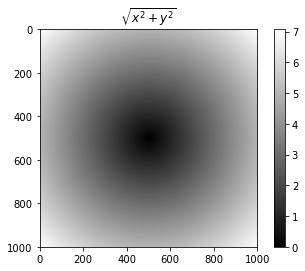

In [70]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.title("$\sqrt{x^2 + y^2}$")
plt.colorbar()

### Example: Random Walks

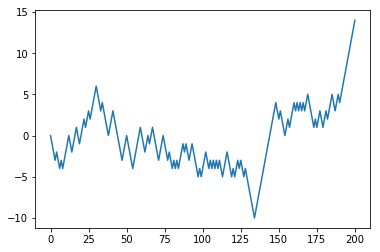

In [71]:
import random
import pylab

position = 0
walk = [position]
steps = 200
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

pylab.plot(walk)
pylab.show()

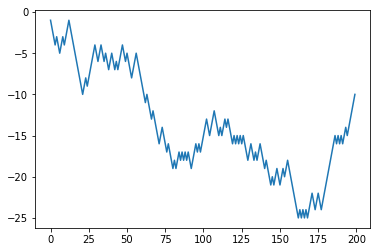

In [72]:
draws = np.random.randint(0, 2, size=200) # randint(low, high) =>  [low, high)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

pylab.plot(walk)
pylab.show()

### Example: Histograms

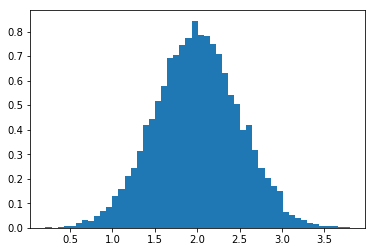

In [73]:
import numpy as np
import matplotlib.pyplot as plt
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,10000)
plt.hist(v, bins=50, normed=1)
plt.show()

## File I/O with Numpy

In [74]:
# save one ndarray
arr = np.arange(10)
np.save('np.npy', arr) # file extension is '.npy', no exception!

In [75]:
# read one ndarray
o = np.load('np.npy')
print(o)

[0 1 2 3 4 5 6 7 8 9]


In [76]:
# save multiple ndarrays
np.savez('np.npz', a=np.arange(5), b=np.arange(10))

In [77]:
# read multiple ndarrays
arch = np.load('np.npz')

In [78]:
# lazy loading, dictionary-like return
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
# CSV file, help(np.loadtxt)
arr = np.loadtxt('stock_px.csv', delimiter=',', skiprows=1, usecols=(1,2,3,4), ndmin=2)

In [80]:
print(arr)

[[    7.4     21.11    29.22   909.03]
 [    7.45    21.14    29.24   908.59]
 [    7.45    21.52    29.96   929.01]
 ..., 
 [  402.19    26.96    77.16  1207.25]
 [  408.43    27.18    76.37  1203.66]
 [  422.      27.27    78.11  1224.58]]


## numpy.linalg

In [81]:
help(np.linalg)

Help on package numpy.linalg in numpy:

NAME
    numpy.linalg

DESCRIPTION
    Core Linear Algebra Tools
    -------------------------
    Linear algebra basics:
    
    - norm            Vector or matrix norm
    - inv             Inverse of a square matrix
    - solve           Solve a linear system of equations
    - det             Determinant of a square matrix
    - lstsq           Solve linear least-squares problem
    - pinv            Pseudo-inverse (Moore-Penrose) calculated using a singular
                      value decomposition
    - matrix_power    Integer power of a square matrix
    
    Eigenvalues and decompositions:
    
    - eig             Eigenvalues and vectors of a square matrix
    - eigh            Eigenvalues and eigenvectors of a Hermitian matrix
    - eigvals         Eigenvalues of a square matrix
    - eigvalsh        Eigenvalues of a Hermitian matrix
    - qr              QR decomposition of a matrix
    - svd             Singular value decomposition 

## What else?
https://docs.scipy.org/doc/numpy/reference/index.html

If you are not be able to remember everything, try to google "numpy cheat sheet". It helps.
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf